# 슈퍼마켓 매장 판매 분석
# Step1. 데이터 불러오기

In [362]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')
import missingno as msno

In [363]:
original = pd.read_csv('/content/drive/MyDrive/데이터톤/Stores.csv')
data = original.copy()
print(data.keys())
print(data.shape)

Index(['Store ID ', 'Store_Area', 'Items_Available', 'Daily_Customer_Count',
       'Store_Sales'],
      dtype='object')
(896, 5)


Store ID: (Index) ID of the particular store.

Store_Area: Physical Area of the store in yard square.

Items_Available: Number of different items available in the corresponding store.

DailyCustomerCount: Number of customers who visited to stores on an average over month.

Store_Sales: Sales in (US $) that stores made.

In [364]:
data.head()

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1,1659,1961,530,66490
1,2,1461,1752,210,39820
2,3,1340,1609,720,54010
3,4,1451,1748,620,53730
4,5,1770,2111,450,46620


In [365]:
target = data['Store_Sales']
target.shape

(896,)

In [366]:
data.drop('Store_Sales', axis=1, inplace=True)
data.head()

,Store ID,Store_Area,Items_Available,Daily_Customer_Count
0,1,1659,1961,530
1,2,1461,1752,210
2,3,1340,1609,720
3,4,1451,1748,620
4,5,1770,2111,450


# 2.결측치확인

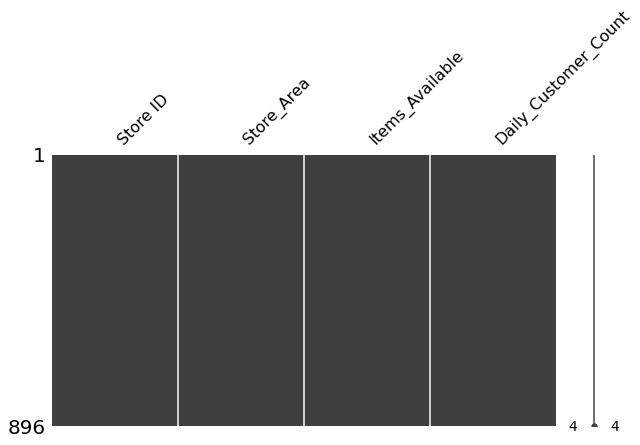

In [367]:
msno.matrix(df=data, figsize=(10,5))

In [368]:
data.isna().sum()

Store ID                0
Store_Area              0
Items_Available         0
Daily_Customer_Count    0
dtype: int64

결측치는 없음
# 3. 시각화

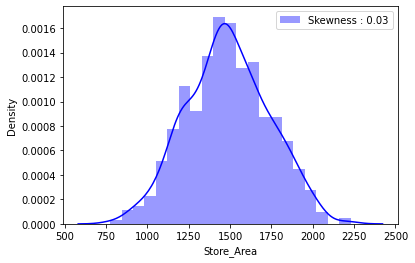

In [369]:
sns.distplot(data['Store_Area'],color='b', label='Skewness : {:.2f}'.format(data['Store_Area'].skew())).legend(loc='best')


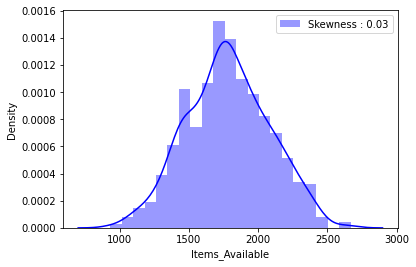

In [370]:
sns.distplot(data['Items_Available'],color='b', label='Skewness : {:.2f}'.format(data['Items_Available'].skew())).legend(loc='best')

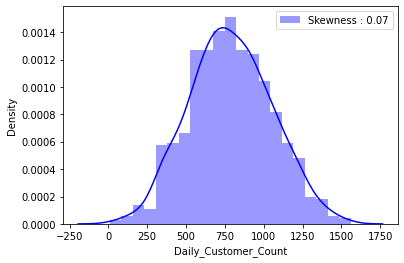

In [371]:
sns.distplot(data['Daily_Customer_Count'],color='b', label='Skewness : {:.2f}'.format(data['Daily_Customer_Count'].skew())).legend(loc='best')

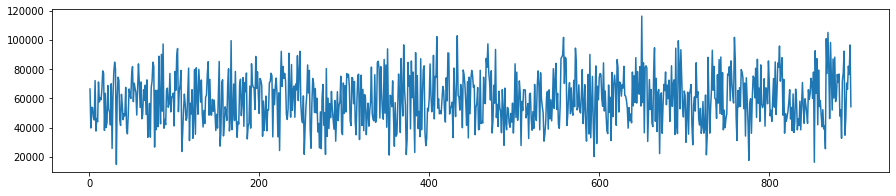

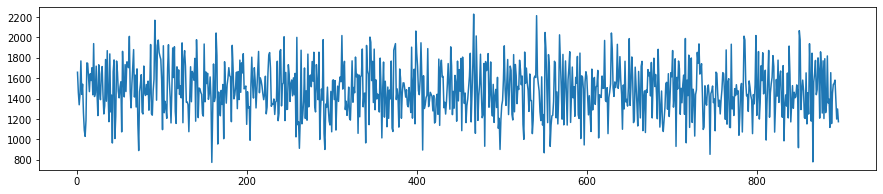

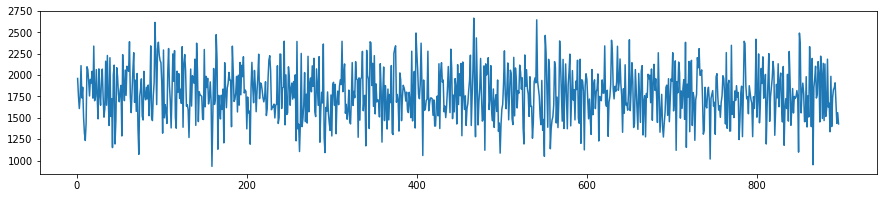

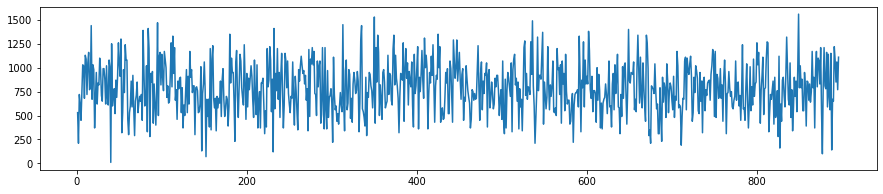

In [372]:
plt.figure(figsize=(15,3))
plt.plot(data['Store ID '], target)
plt.figure(figsize=(15,3))
plt.plot(data['Store ID '],data['Store_Area'] )
plt.figure(figsize=(15,3))
plt.plot(data['Store ID '],data['Items_Available'] )
plt.figure(figsize=(15,3))
plt.plot(data['Store ID '],data['Daily_Customer_Count'] )

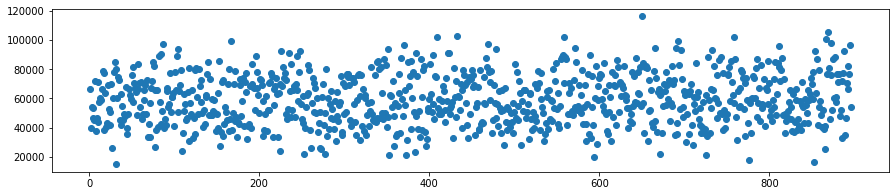

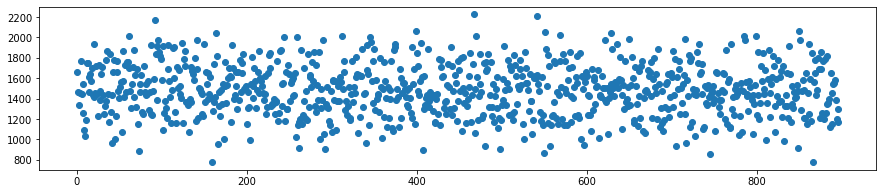

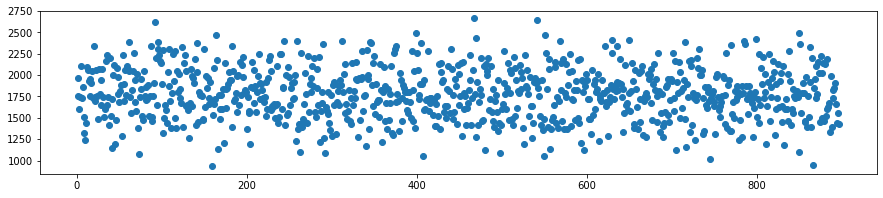

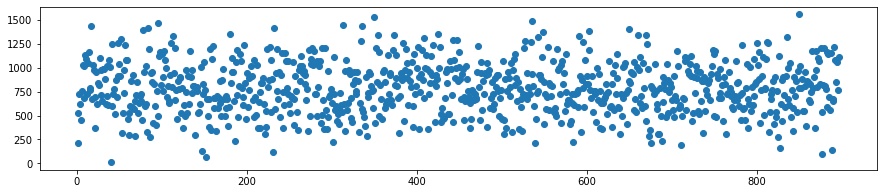

In [373]:
plt.figure(figsize=(15,3))
plt.scatter(data['Store ID '],target)
plt.figure(figsize=(15,3))
plt.scatter(data['Store ID '],data['Store_Area'] )
plt.figure(figsize=(15,3))
plt.scatter(data['Store ID '],data['Items_Available'] )
plt.figure(figsize=(15,3))
plt.scatter(data['Store ID '],data['Daily_Customer_Count'] )

In [374]:
data.describe()

,Store ID,Store_Area,Items_Available,Daily_Customer_Count
count,896.000000,896.000000,896.000000,896.000000
mean,448.500000,1485.409598,1782.035714,786.350446
std,258.797218,250.237011,299.872053,265.389281
min,1.000000,775.000000,932.000000,10.000000
25%,224.750000,1316.750000,1575.500000,600.000000
50%,448.500000,1477.000000,1773.500000,780.000000
75%,672.250000,1653.500000,1982.750000,970.000000
max,896.000000,2229.000000,2667.000000,1560.000000


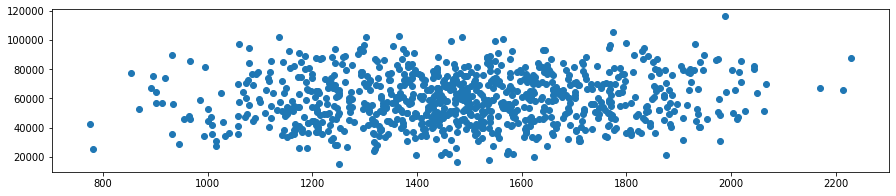

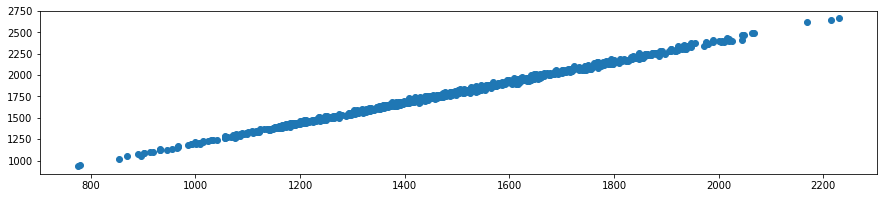

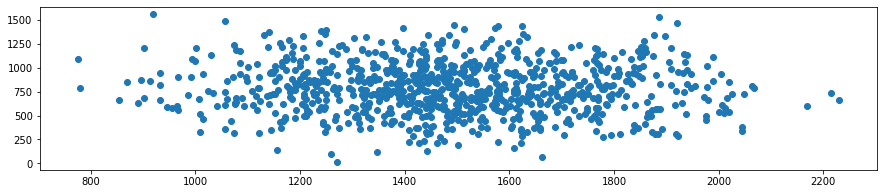

In [375]:
plt.figure(figsize=(15,3))
plt.scatter(data['Store_Area'],target)
plt.figure(figsize=(15,3))
plt.scatter(data['Store_Area'],data['Items_Available'] )
plt.figure(figsize=(15,3))
plt.scatter(data['Store_Area'],data['Daily_Customer_Count'])

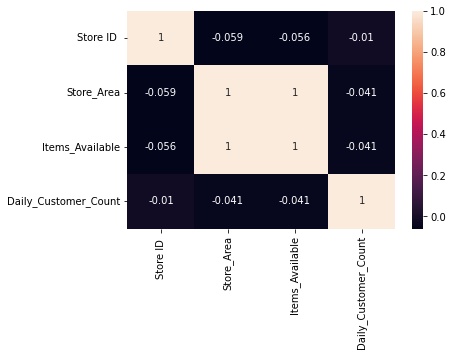

In [376]:
sns.heatmap(data.corr(), annot=True)

In [377]:
data['Area_Class'] =0 
data['Area_Class'][data['Store_Area']<800] = 9
data['Area_Class'][(data['Store_Area']>800)&(data['Store_Area']<1000)] = 8
data['Area_Class'][(data['Store_Area']>1000)&(data['Store_Area']<1200)] = 7
data['Area_Class'][(data['Store_Area']>1200)&(data['Store_Area']<1400)] = 6
data['Area_Class'][(data['Store_Area']>1400)&(data['Store_Area']<1600)] = 5
data['Area_Class'][(data['Store_Area']>1600)&(data['Store_Area']<1800)] = 4
data['Area_Class'][(data['Store_Area']>1800)&(data['Store_Area']<2000)] = 3
data['Area_Class'][(data['Store_Area']>2000)&(data['Store_Area']<2200)] = 2
data['Area_Class'][data['Store_Area']>2200] = 1

In [378]:
data.head()

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Area_Class
0,1,1659,1961,530,4
1,2,1461,1752,210,5
2,3,1340,1609,720,6
3,4,1451,1748,620,5
4,5,1770,2111,450,4


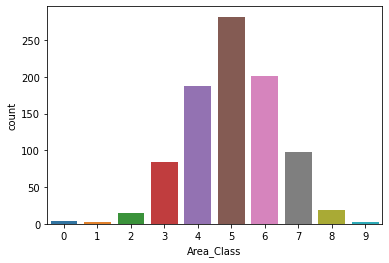

In [379]:
sns.countplot('Area_Class', data=data)

In [380]:
df = pd.read_csv('/content/drive/MyDrive/데이터톤/Stores.csv')
df['Area_Class'] =0 
df['Area_Class'][df['Store_Area']<800] = 9
df['Area_Class'][(df['Store_Area']>=800)&(df['Store_Area']<1000)] = 8
df['Area_Class'][(df['Store_Area']>=1000)&(df['Store_Area']<1200)] = 7
df['Area_Class'][(df['Store_Area']>=1200)&(df['Store_Area']<1400)] = 6
df['Area_Class'][(df['Store_Area']>=1400)&(df['Store_Area']<1600)] = 5
df['Area_Class'][(df['Store_Area']>=1600)&(df['Store_Area']<1800)] = 4
df['Area_Class'][(df['Store_Area']>=1800)&(df['Store_Area']<2000)] = 3
df['Area_Class'][(df['Store_Area']>=2000)&(df['Store_Area']<2200)] = 2
df['Area_Class'][df['Store_Area']>=2200] = 1

In [381]:
df.head()

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales,Area_Class
0,1,1659,1961,530,66490,4
1,2,1461,1752,210,39820,5
2,3,1340,1609,720,54010,6
3,4,1451,1748,620,53730,5
4,5,1770,2111,450,46620,4


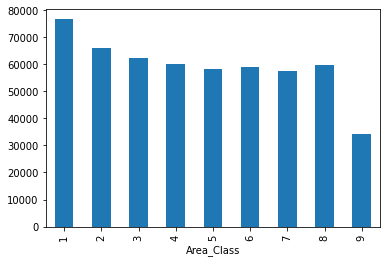

In [382]:
df['Store_Sales'].groupby(df['Area_Class']).mean().plot(kind='bar')

# 구간을 동일한 개수로 나눔

In [383]:
Sorted_df = df.sort_values(by = 'Store_Area')
print(Sorted_df)

     Store ID   Store_Area  Items_Available  Daily_Customer_Count  \
158        159         775              932                  1090   
865        866         780              951                   790   
744        745         854             1018                   660   
549        550         869             1050                   850   
72          73         891             1073                   630   
..         ...         ...              ...                   ...   
398        399        2063             2493                   810   
849        850        2067             2492                   790   
91          92        2169             2617                   600   
540        541        2214             2647                   740   
466        467        2229             2667                   660   

     Store_Sales  Area_Class  
158        42530           9  
865        25600           9  
744        77740           8  
549        52540           8  
72         67370

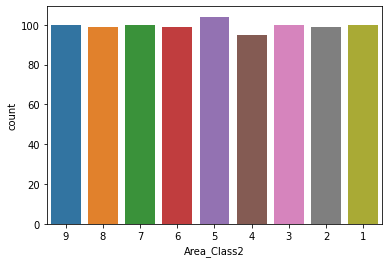

In [384]:
df['Area_Class2'] = pd.qcut(Sorted_df['Store_Area'],labels = [9, 8, 7, 6, 5, 4, 3, 2, 1], q=9)
sns.countplot('Area_Class2', data=df)

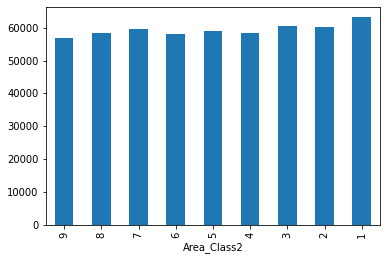

In [385]:
df['Store_Sales'].groupby(df['Area_Class2']).mean().plot(kind='bar')

In [386]:
Sorted_df[df['Area_Class2'] == 9]['Store_Sales'].mean()

56764.4

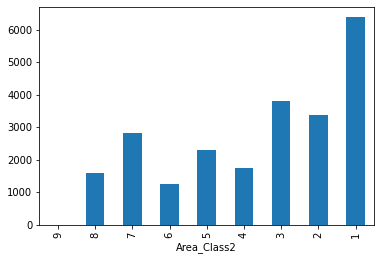

In [387]:
(df['Store_Sales'] - 56764.4).groupby(df['Area_Class2']).mean().plot(kind='bar')

In [388]:
C1 = df['Store_Sales'][df['Area_Class2']==1]


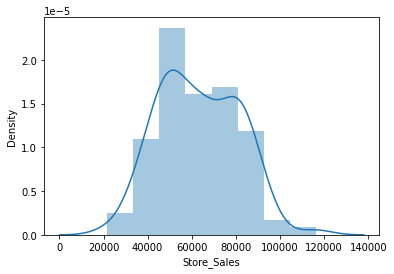

In [389]:
sns.distplot(C1)


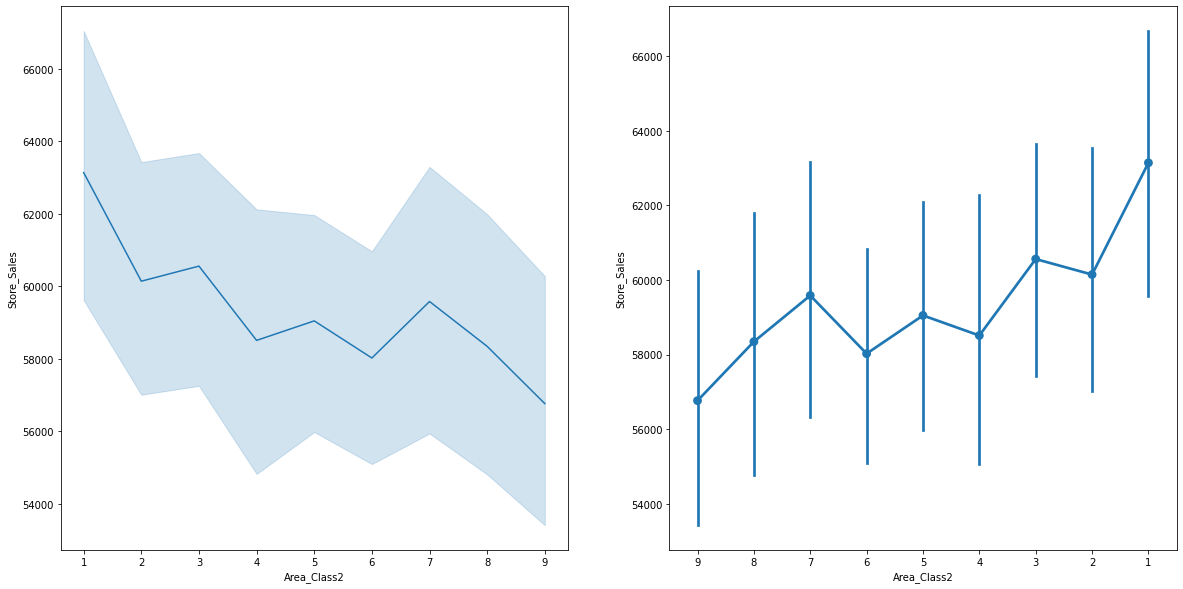

In [390]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(20,10)
sns.lineplot(x='Area_Class2', y='Store_Sales', data=df, ax=ax[0])
sns.pointplot(x = "Area_Class2",y = "Store_Sales", data = df, ax=ax[1])

약간의 상관관계가 보임, 규모가클수록 판매평균이 올라감, 하지만 지그재그형식으로 올라가기때문에 좀더 일반화 시킬 필요성이 있어보임

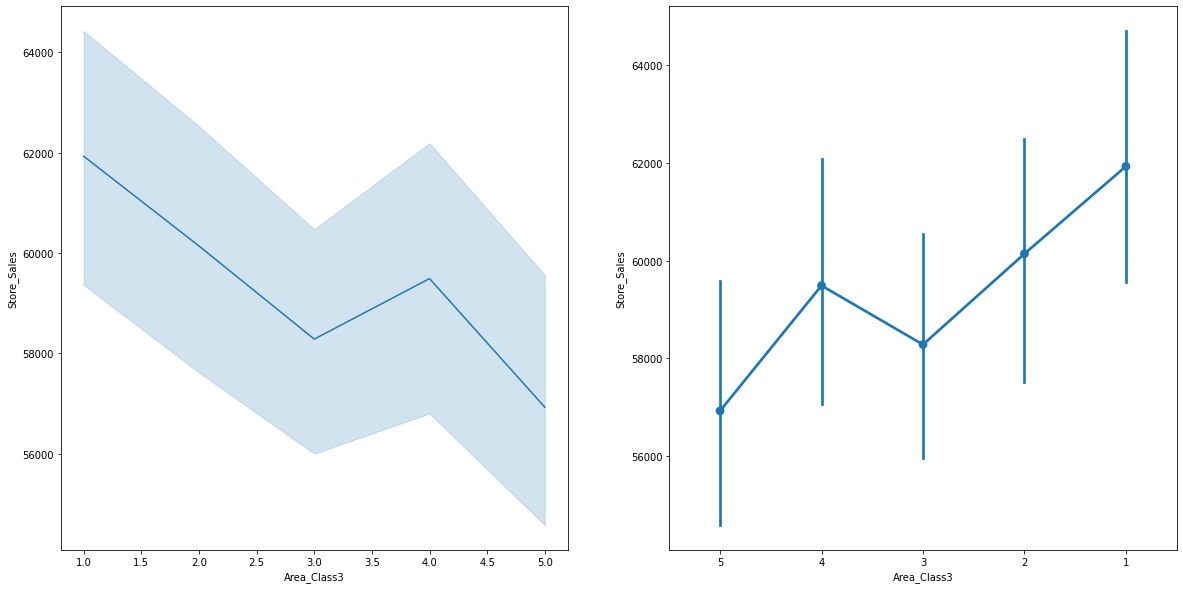

In [391]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(20,10)
df['Area_Class3'] = pd.qcut(Sorted_df['Store_Area'],labels = [5, 4, 3, 2, 1], q=5)
sns.lineplot(x='Area_Class3', y='Store_Sales', data=df, ax=ax[0])
sns.pointplot(x = "Area_Class3",y = "Store_Sales", data = df, ax=ax[1])

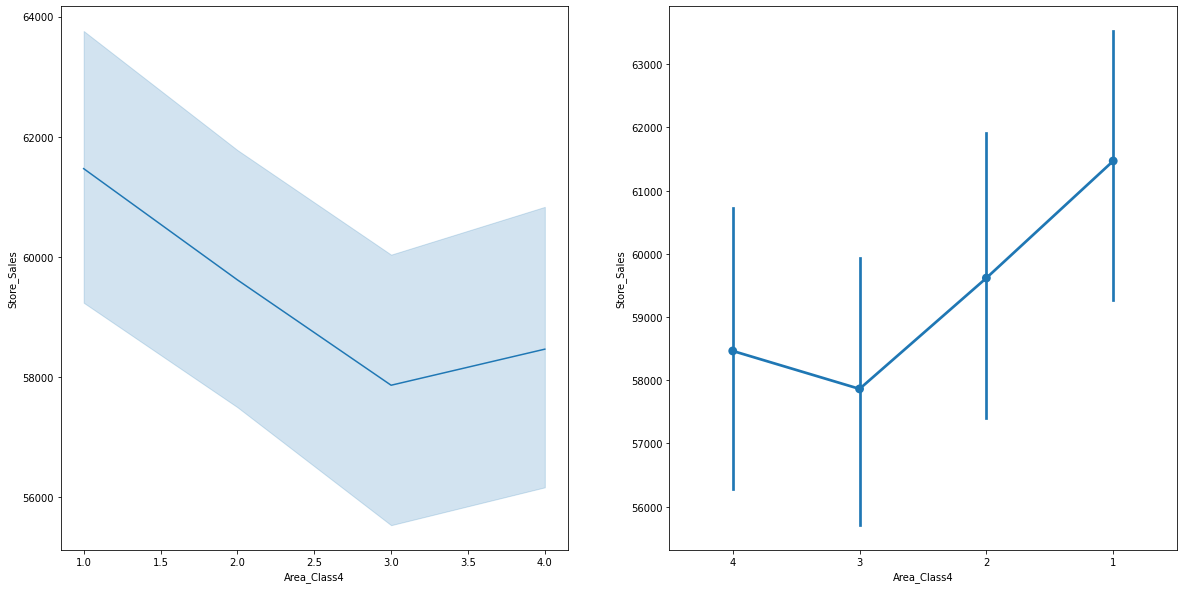

In [392]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(20,10)
df['Area_Class4'] = pd.qcut(Sorted_df['Store_Area'],labels = [4, 3, 2, 1], q=4)
sns.lineplot(x='Area_Class4', y='Store_Sales', data=df, ax=ax[0])
sns.pointplot(x = "Area_Class4",y = "Store_Sales", data = df, ax=ax[1])

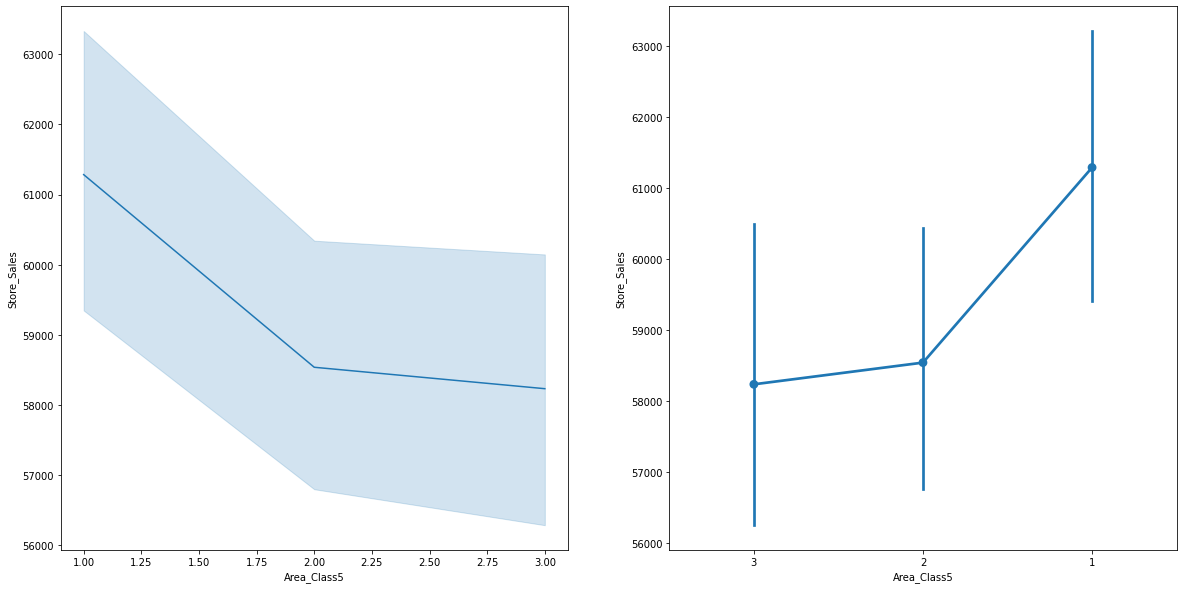

In [393]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(20,10)
df['Area_Class5'] = pd.qcut(Sorted_df['Store_Area'],labels = [3, 2, 1], q=3)
sns.lineplot(x='Area_Class5', y='Store_Sales', data=df, ax=ax[0])
sns.pointplot(x = "Area_Class5",y = "Store_Sales", data = df, ax=ax[1])

# 가게규모랑 손님수 상관관계

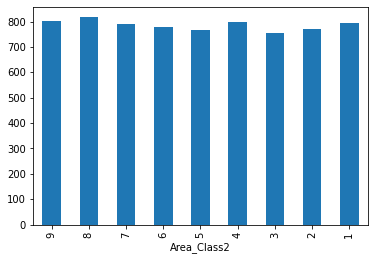

In [394]:
df['Daily_Customer_Count'].groupby(df['Area_Class2']).mean().plot(kind='bar')

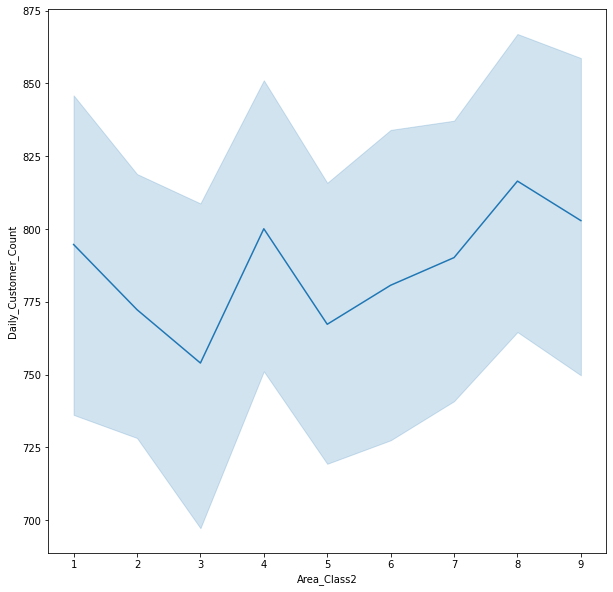

In [395]:
plt.figure(figsize=(10,10))
sns.lineplot(x='Area_Class2', y='Daily_Customer_Count', data=df)

규모랑 손님수랑 별로 상관이 없어보임

In [396]:
df['Area_Class2'] = df['Area_Class2'].astype('int')
df['Area_Class3'] = df['Area_Class3'].astype('int')
df['Area_Class4'] = df['Area_Class4'].astype('int')
df['Area_Class5'] = df['Area_Class5'].astype('int')


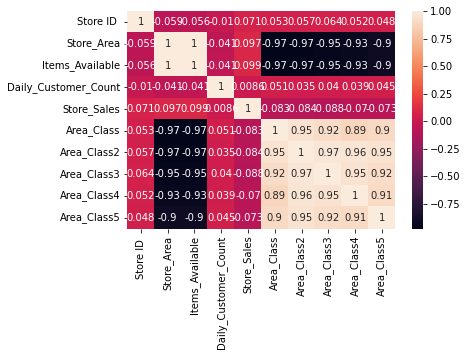

In [397]:
sns.heatmap(df.corr(), annot=True)

# 물건수랑 판매치,손님수 상관관계

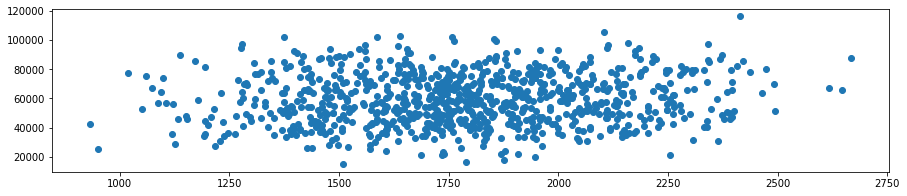

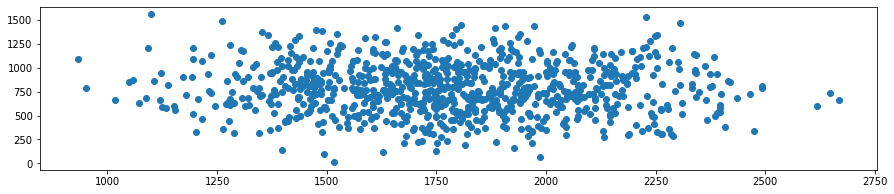

In [398]:
plt.figure(figsize=(15,3))
plt.scatter(data['Items_Available'],target)
plt.figure(figsize=(15,3))
plt.scatter(data['Items_Available'],data['Daily_Customer_Count'] )

# 손님수와 판매치 상관관계 만들기(?)

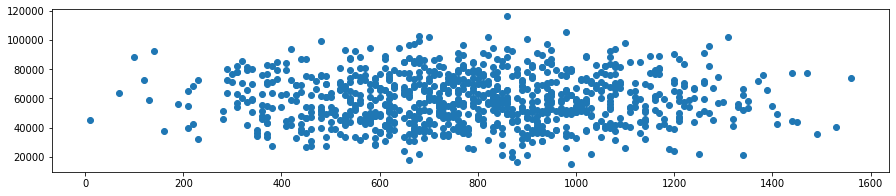

In [399]:
plt.figure(figsize=(15,3))
plt.scatter(data['Daily_Customer_Count'], target )

In [400]:
Sorted_df = df.sort_values(by = 'Daily_Customer_Count')
Sorted_df.tail()

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales,Area_Class,Area_Class2,Area_Class3,Area_Class4,Area_Class5
312,313,1494,1806,1450,43640,5,5,3,2,2
94,95,1921,2305,1470,77120,3,1,1,1,1
535,536,1057,1262,1490,35420,7,9,5,4,3
349,350,1886,2228,1530,40350,3,1,1,1,1
848,849,919,1099,1560,73810,8,9,5,4,3


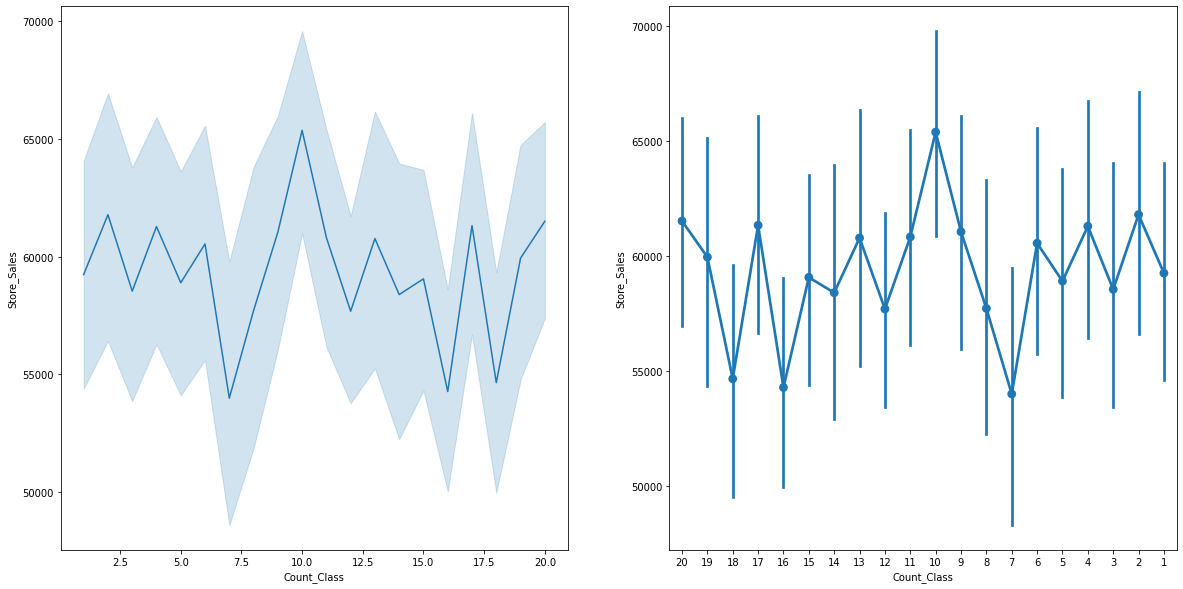

In [453]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(20,10)
df['Count_Class'] = pd.qcut(Sorted_df['Daily_Customer_Count'],labels = [20,19,18,17,16,15,14,13,12,11,10,9,8,7,6,5, 4, 3, 2, 1], q=20)
sns.lineplot(x='Count_Class', y='Store_Sales', data=df, ax=ax[0])
sns.pointplot(x = "Count_Class",y = "Store_Sales", data = df, ax=ax[1])

In [402]:
df['Store_Sales'].shape

(896,)

In [404]:
df['unit_thousand'] = 0

for i in range(896):
  df['unit_thousand'][i] = round(df['Store_Sales'][i], -3)

df['unit_thousand']

0      66000
1      40000
2      54000
3      54000
4      47000
       ...  
891    66000
892    82000
893    76000
894    97000
895    54000
Name: unit_thousand, Length: 896, dtype: int64

In [410]:
df.head()

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales,Area_Class,Area_Class2,Area_Class3,Area_Class4,Area_Class5,Count_Class,unit_thousand
0,1,1659,1961,530,66490,4,3,2,1,1,17,66000
1,2,1461,1752,210,39820,5,5,3,3,2,20,40000
2,3,1340,1609,720,54010,6,7,4,3,3,12,54000
3,4,1451,1748,620,53730,5,5,3,3,2,15,54000
4,5,1770,2111,450,46620,4,2,1,1,1,18,47000


In [406]:
count={}

for i in df['unit_thousand']:
    try: count[i] += 1
    except: count[i]=1
print(count)

{66000: 28, 40000: 15, 54000: 25, 47000: 17, 45000: 14, 72000: 14, 38000: 11, 46000: 18, 44000: 15, 71000: 17, 58000: 15, 60000: 21, 59000: 18, 79000: 11, 77000: 15, 64000: 17, 43000: 19, 69000: 18, 53000: 12, 51000: 25, 42000: 14, 70000: 18, 26000: 5, 61000: 16, 78000: 16, 85000: 9, 80000: 10, 15000: 1, 75000: 10, 63000: 12, 55000: 13, 50000: 24, 48000: 12, 68000: 11, 36000: 16, 49000: 22, 67000: 14, 76000: 17, 82000: 13, 84000: 9, 73000: 10, 33000: 8, 57000: 20, 34000: 9, 27000: 3, 39000: 18, 41000: 12, 89000: 4, 90000: 4, 97000: 4, 65000: 16, 56000: 19, 94000: 5, 24000: 2, 52000: 18, 81000: 11, 31000: 7, 62000: 16, 37000: 9, 100000: 1, 74000: 17, 32000: 4, 92000: 3, 91000: 4, 83000: 5, 22000: 4, 35000: 8, 87000: 12, 21000: 2, 86000: 3, 23000: 1, 28000: 4, 102000: 3, 103000: 1, 88000: 7, 20000: 1, 29000: 1, 116000: 1, 95000: 1, 99000: 1, 93000: 3, 30000: 1, 18000: 1, 96000: 1, 16000: 1, 101000: 1, 105000: 1, 98000: 1}


In [454]:
df['Daily_Customer_Count'][df['unit_thousand']==66000]

0       530
14      770
56     1240
63      860
77     1390
79      600
101     760
120     890
216     840
239     920
243     610
321     470
370     610
437     520
485     580
510    1050
511     330
512     980
540     740
660     980
669    1340
731     520
733     650
796     700
823     760
830     900
845     860
891    1080
Name: Daily_Customer_Count, dtype: int64

In [413]:
df['Daily_Customer_Count'][df['unit_thousand'] == 66000].mean()

802.8571428571429

In [423]:
count.keys()

dict_keys([66000, 40000, 54000, 47000, 45000, 72000, 38000, 46000, 44000, 71000, 58000, 60000, 59000, 79000, 77000, 64000, 43000, 69000, 53000, 51000, 42000, 70000, 26000, 61000, 78000, 85000, 80000, 15000, 75000, 63000, 55000, 50000, 48000, 68000, 36000, 49000, 67000, 76000, 82000, 84000, 73000, 33000, 57000, 34000, 27000, 39000, 41000, 89000, 90000, 97000, 65000, 56000, 94000, 24000, 52000, 81000, 31000, 62000, 37000, 100000, 74000, 32000, 92000, 91000, 83000, 22000, 35000, 87000, 21000, 86000, 23000, 28000, 102000, 103000, 88000, 20000, 29000, 116000, 95000, 99000, 93000, 30000, 18000, 96000, 16000, 101000, 105000, 98000])

In [447]:
df['re_customer'] = 0
for i in count.keys():
  df['re_customer'][df['unit_thousand'] == i] = df['Daily_Customer_Count'][df['unit_thousand'] == i].mean()

df['re_customer']

0      802.857143
1      880.000000
2      780.000000
3      780.000000
4      747.647059
          ...    
891    802.857143
892    837.692308
893    812.941176
894    760.000000
895    780.000000
Name: re_customer, Length: 896, dtype: float64

In [448]:
Sorted_df = df.sort_values(by = 're_customer')
Sorted_df

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales,Area_Class,Area_Class2,Area_Class3,Area_Class4,Area_Class5,Count_Class,unit_thousand,re_customer
76,77,1267,1520,450,26770,6,8,4,4,3,1,27000,466.666667
153,154,1649,1963,490,27410,4,3,2,2,1,1,27000,466.666667
358,359,1015,1216,460,27310,7,9,5,4,3,1,27000,466.666667
692,693,1548,1858,480,99480,5,4,2,2,2,1,99000,480.000000
664,665,1766,2111,580,94690,4,2,1,1,1,1,95000,580.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,278,1572,1869,1030,21750,5,4,2,2,2,1,22000,1075.000000
252,253,1583,1907,680,21830,5,4,2,2,2,1,22000,1075.000000
670,671,1461,1739,1250,22310,5,5,3,3,2,1,22000,1075.000000
871,872,1800,2158,1100,98260,3,2,1,1,1,1,98000,1100.000000


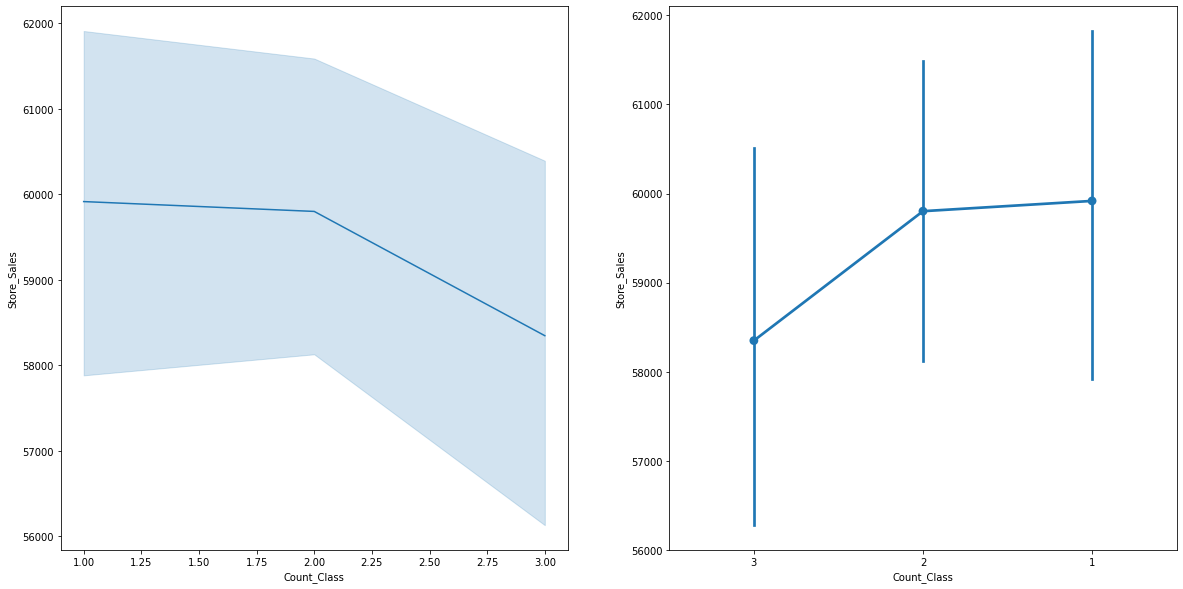

In [451]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(20,10)
df['Count_Class'] = pd.qcut(Sorted_df['re_customer'],labels = [3, 2, 1], q=3)
sns.lineplot(x='Count_Class', y='Store_Sales', data=df, ax=ax[0])
sns.pointplot(x = "Count_Class",y = "Store_Sales", data = df, ax=ax[1])